<a href="https://colab.research.google.com/github/gchinca/e-commerce/blob/main/clientes_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANÁLISIS DE CLIENTES E-COMMERCE**

El objetivo principal del proyecto es proporcionar una comprensión detallada del comportamiento de compra de los clientes en diferentes países, identificando a aquellos clientes que son más valiosos para el negocio. El proyecto se centra en el análisis de datos de ventas para segmentar clientes utilizando la metodología RFM (Recency, Frequency, Monetary) para los clientes de UK.
Se espera obtener una comprensión más profunda del comportamiento de compra de los clientes en diferentes países, lo que permitirá a la empresa tomar decisiones más informadas y estratégicas en términos de marketing, ventas y atención al cliente.

# **OBJETIVOS**

¿Identificar cuánto se vende en promedio al mes?

¿Cuántas ventas tienen en cada mes?

¿Cuál es el mes que más vende la empresa?

¿Quiénes son los clientes más importantes?

¿Cuál es el monto promedio que gastan los clientes?

¿Qué porcentaje de clientes ha vuelto a comprar?


## **PROCESO DE EXTRACCIÓN**

In [1]:
!pip install pygwalker -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.3/993.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00


In [2]:
# Acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Se importa las librerias que se usará en el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Lectura del archivo .csv y se almacena en un DataFrame
ecommerce = '/content/drive/MyDrive/Colab Notebooks/PROYECTOS/SEGMENTACION DE CLIENTES ECOMMERCE/ventas-por-factura.csv'
ventas= pd.read_csv(ecommerce)


In [5]:
# Revisión de las primeras filas del dataset para entender los datos
ventas.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


## **PROCESO DE TRANSFORMACIÓN**
### **DETECCIÓN DE VALORES NULOS Y VACÍOS**

In [6]:
# Información sobre el dataframe
ventas.info()
# Número de filas y columnas del dataframe
ventas.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


(25953, 6)

In [7]:
# Se cambia el tipo de dato para la columna 'Monto' por float
ventas['Monto'] = ventas['Monto'].str.replace(',', '.').astype(float)

In [8]:
# Cantidad de valores faltantes por columna
ventas.isna().sum()

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64

In [9]:
# Información estadística de las columnas del dataframe
ventas.describe()

,ID Cliente,Cantidad,Monto
count,22229.000000,25953.000000,25953.000000
mean,15238.289892,199.474049,375.657552
std,1732.981685,1107.075809,2009.042459
min,12346.000000,-80995.000000,-168469.600000
25%,13755.000000,6.000000,11.550000
50%,15136.000000,100.000000,207.050000
75%,16746.000000,240.000000,408.660000
max,18287.000000,80995.000000,168469.600000


### **DETECCIÓN DE DUPLICADOS**

In [10]:
# Se comprueba el tamaño del dataset antes de eliminar duplicados
ventas.shape

(25953, 6)

In [11]:
# Verificar cuantas facturas hay duplicadas
duplicados = ventas.duplicated('N° de factura').value_counts().to_dict()
if  duplicados.get(True):
   print(f'Hay {duplicados[True]} filas duplicadas')
else:
   print(f'No hay filas duplicadas')

Hay 53 filas duplicadas


In [12]:
# Se confirma la cantidad de facturas únicas que hay en el dataset
len(ventas['N° de factura'].unique())

25900

In [13]:
# Se elimina las filas duplicados según la columna 'N° de factura'
ventas=ventas.drop_duplicates('N° de factura')

In [14]:
# Se comprueba el tamaño del dataset después de eliminar duplicados
ventas.shape

(25900, 6)

### **ANÁLISIS DE VALORES NEGATIVOS**

In [15]:
# Se obtiene el índice de filas que contienen valores negativos en la columna 'Monto' y se eliminan. Los montos negativos corresponden a devoluciones y por ahora no son de interes para el análisis.
ventas.drop(ventas[ventas['Monto']<0].index, inplace=True)

<ipython-input-15-6ed06b581349>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas.drop(ventas[ventas['Monto']<0].index, inplace=True)


In [16]:
ventas.describe()

,ID Cliente,Cantidad,Monto
count,18536.000000,22062.000000,22062.000000
mean,15266.224158,246.607425,481.998095
std,1734.178524,931.245454,1694.847333
min,12346.000000,-9600.000000,0.000000
25%,13773.500000,48.000000,114.060000
50%,15176.500000,133.000000,272.350000
75%,16779.000000,274.000000,460.262500
max,18287.000000,80995.000000,168469.600000


⚠️ - Se identifica montos de venta por 0 unidades monetarias. Este dato se debe revisar con el cliente ya que puede ser un error de digitación o productos gratis.

⚠️ - Las cantidades negativas significan productos devueltos.

In [17]:
ventas.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98


In [18]:
ventas['Fecha de factura'] = pd.to_datetime(ventas['Fecha de factura'])

In [19]:
ruta='/content/drive/MyDrive/Colab Notebooks/PROYECTOS/SEGMENTACION DE CLIENTES ECOMMERCE/ventas_limpio.csv'
ventas.to_csv(ruta)

# **ANÁLISIS EXPLORATORIO DEL DATASET**

In [20]:
# Se crea una nueva columna 'Año_mes'
ventas['Año_mes'] = ventas['Fecha de factura'].dt.strftime('%Y-%m')

In [21]:
ventas.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,Año_mes
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11


In [22]:
# Top 5 de paises con la mayor cantidad de facturas
cantidad_facturas=ventas['País'].value_counts().sort_values(ascending=False)
print(cantidad_facturas.head(5))

País
United Kingdom    20120
Germany             457
France              392
EIRE                288
Belgium              98
Name: count, dtype: int64


In [23]:
# Porcentaje de facturas por país
facturas_por_pais = pd.crosstab(index=ventas['País'], columns='cantidad_facturas', normalize=True) * 100
facturas_por_pais = facturas_por_pais.sort_values(by='cantidad_facturas', ascending=False)
print(facturas_por_pais.head(5))

col_0           cantidad_facturas
País                             
United Kingdom          91.197534
Germany                  2.071435
France                   1.776811
EIRE                     1.305412
Belgium                  0.444203


In [24]:
# Análisis del Top 5 de paises con mayor facturación
ventas.groupby('País')['Monto'].agg(['sum', 'min', 'mean', 'max']).round(2).sort_values(by='sum', ascending=False).head(5)

,sum,min,mean,max
País,,,,
United Kingdom,8993543.47,0.00,447.0,168469.60
Netherlands,285446.34,0.00,3004.7,20277.92
EIRE,283249.06,1.45,983.5,16774.72
Germany,228867.14,3.00,500.8,9341.26
France,208779.98,4.63,532.6,8895.76


In [25]:
# Porcentaje del monto total de facturación por país
total_monto = ventas['Monto'].sum()
monto_por_pais= ((ventas.groupby('País')['Monto'].sum()/total_monto)*100).round(2)
monto_por_pais= monto_por_pais.reset_index().sort_values(by='Monto', ascending=False)
monto_por_pais.head(5)

,País,Monto
36,United Kingdom,84.57
24,Netherlands,2.68
10,EIRE,2.66
14,Germany,2.15
13,France,1.96


In [26]:
# Análisis de clientes pertenecientes al Reino Unido y extranjeros
ventas['UK'] = ventas['País'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'NO UK')
ventas.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,Año_mes,UK
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03,UK
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11,UK
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04,UK
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10,UK
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11,NO UK


In [27]:
# Número de facturas por mes en UK vs ventas en el extranjero

ventas_UK = ventas.groupby(['UK', 'Año_mes'])['N° de factura'].count().reset_index()



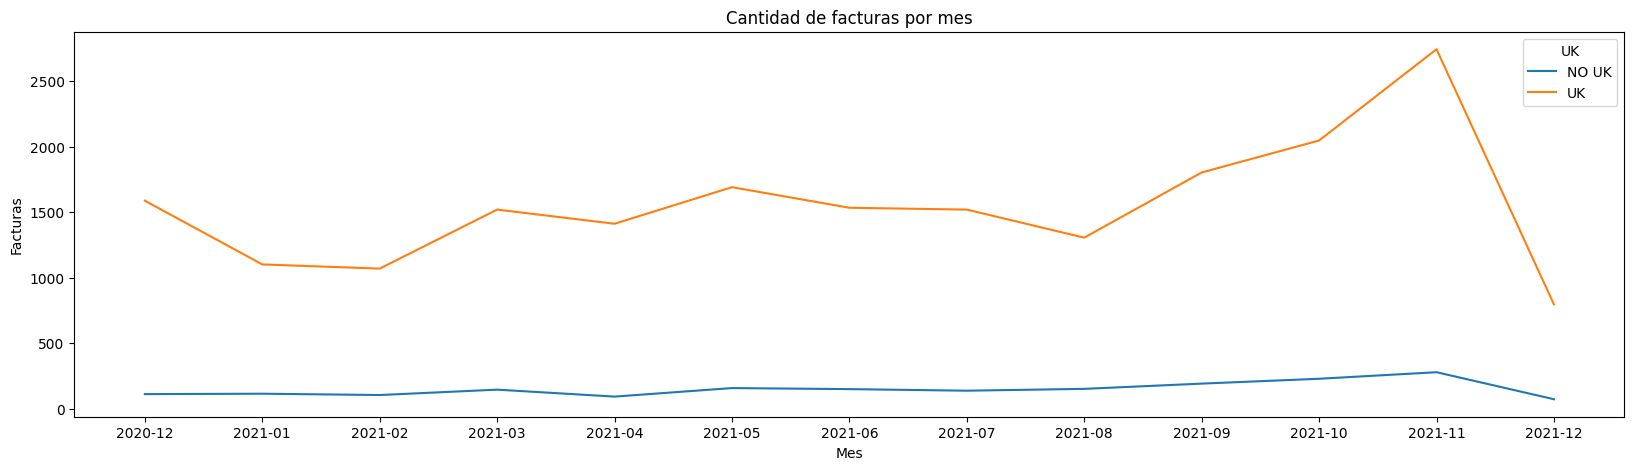

In [28]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(data=ventas_UK, x='Año_mes', y='N° de factura', hue='UK').set(title='Cantidad de facturas por mes', xlabel='Mes', ylabel='Facturas')
sns.set_theme(style='white', font_scale=2)

In [29]:
# Total facturación por mes en UK vs facturación en el extranjero

facturacion_UK = ventas.groupby(['UK', 'Año_mes'])['Monto'].sum().reset_index()

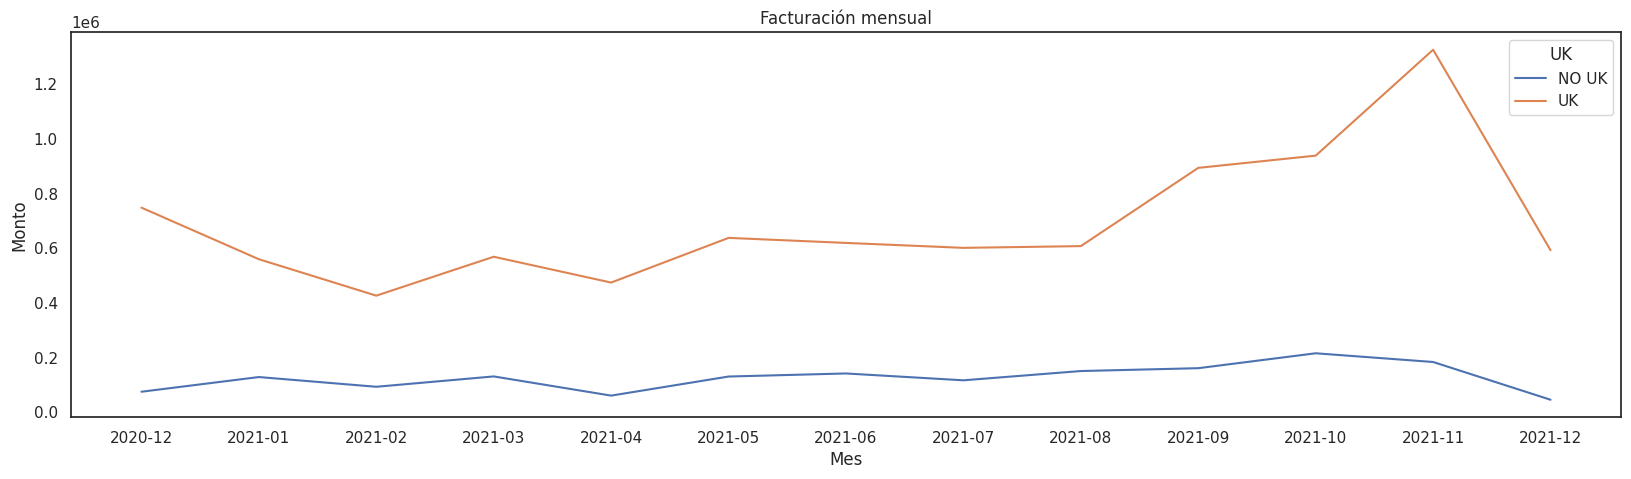

In [58]:
fig = plt.subplots(figsize=(20, 5))
plt.rc('font', size=0.5)
sns.lineplot(data=facturacion_UK, x='Año_mes', y='Monto', hue='UK').set(title='Facturación mensual', xlabel='Mes', ylabel='Monto')
sns.set_theme(style='white')

In [31]:
# Cantidad de clientes unicos por mes

clientes = ventas.groupby('Año_mes')['ID Cliente'].nunique().reset_index()
clientes.head()

,Año_mes,ID Cliente
0,2020-12,885
1,2021-01,741
2,2021-02,758
3,2021-03,974
4,2021-04,856


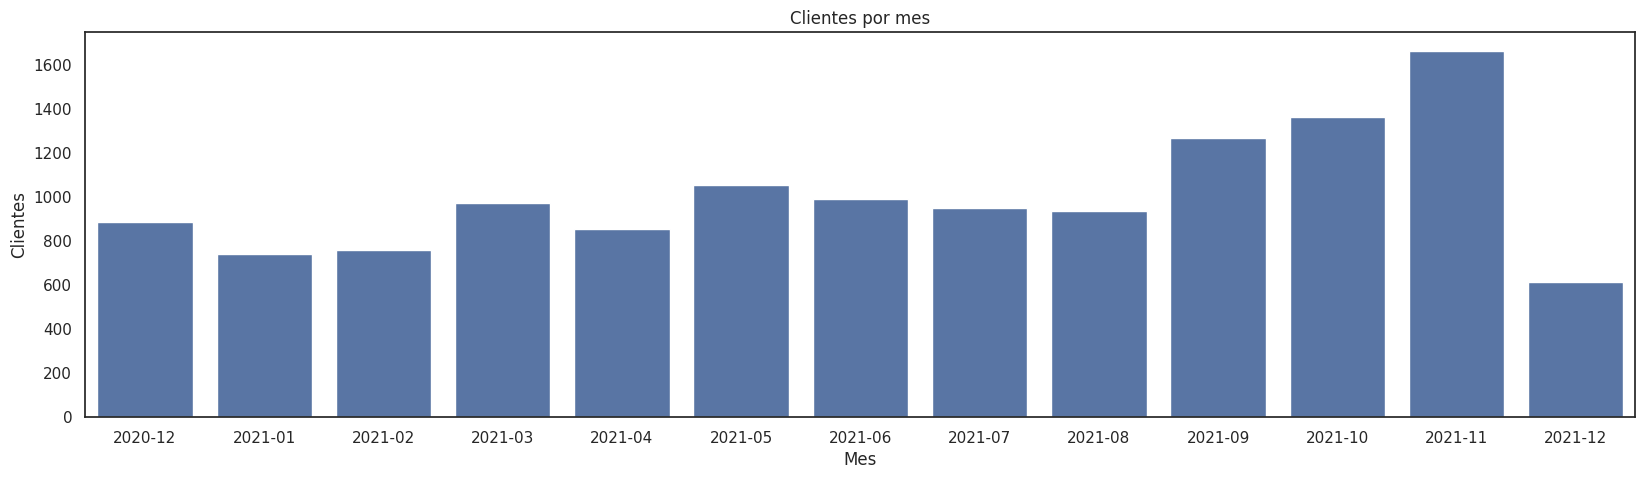

In [32]:
fig = plt.subplots(figsize=(20, 5))
plt.rc('font', size=1)
sns.barplot(data=clientes, x='Año_mes', y='ID Cliente').set(title='Clientes por mes', xlabel='Mes', ylabel='Clientes')
sns.set_theme(style='white')

In [60]:
# Monto promedio de ventas por mes
ventas_mes= ventas.groupby('Año_mes')['Monto'].mean().round(2).reset_index()
ventas_mes.sort_values(by='Monto', ascending=False).head()

,Año_mes,Monto
12,2021-12,735.09
1,2021-01,566.48
9,2021-09,529.16
8,2021-08,520.75
10,2021-10,507.39


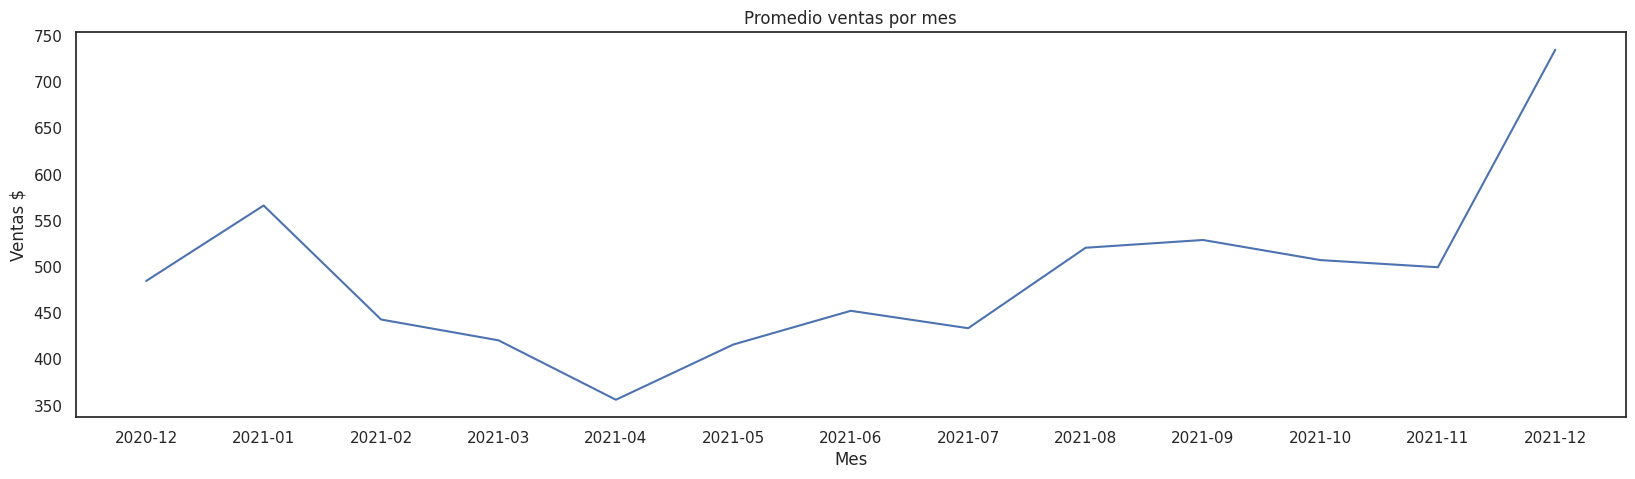

In [34]:
fig = plt.subplots(figsize=(20, 5))
plt.rc('font', size=1)
sns.lineplot(data=ventas_mes, x='Año_mes', y='Monto').set(title='Promedio ventas por mes', xlabel='Mes', ylabel='Ventas $')
sns.set_theme(style='white')

In [35]:
# Análisis de ventas totales por mes
ventas_totales_mes=ventas.groupby('Año_mes')['Monto'].sum().round(2)
ventas_totales_mes

Año_mes
2020-12     823707.08
2021-01     688841.33
2021-02     520165.78
2021-03     700205.01
2021-04     535719.20
2021-05     768751.81
2021-06     761541.67
2021-07     718519.89
2021-08     758727.16
2021-09    1055140.87
2021-10    1154320.20
2021-11    1509409.29
2021-12     638792.68
Name: Monto, dtype: float64

<Axes: title={'center': 'Ventas totales por mes'}, xlabel='Mes', ylabel='Monto'>

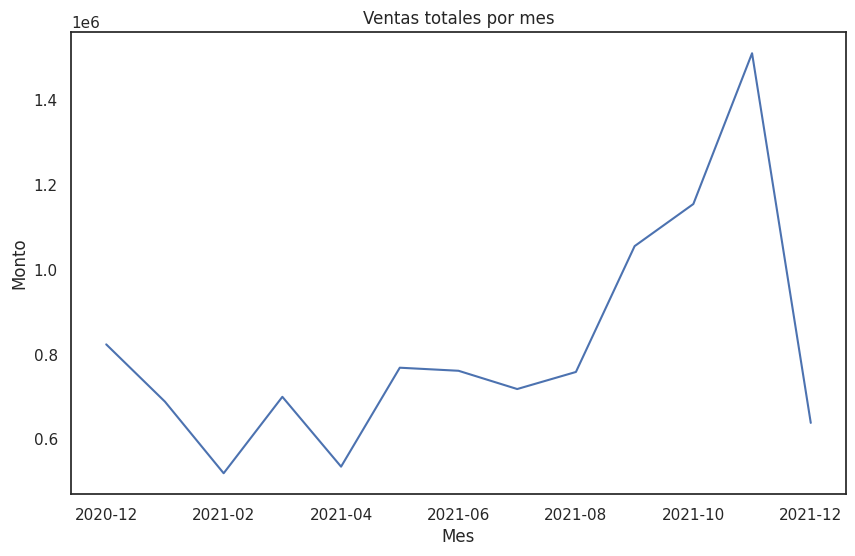

In [36]:
fig = plt.subplots(figsize=(20, 5))
plt.rc('font', size=1)
ventas_totales_mes.plot(kind='line', title='Ventas totales por mes',
               ylabel='Monto', xlabel='Mes', figsize=(10, 6))

In [37]:
ventas.groupby('Año_mes')['Monto'].agg(['mean','median', 'max', 'min'])

,mean,median,max,min
Año_mes,,,,
2020-12,484.818764,230.10,18745.86,0.0
2021-01,566.481357,279.16,77183.60,0.0
2021-02,443.071363,287.66,14022.92,0.0
2021-03,420.543550,247.25,16726.84,0.0
2021-04,356.196277,231.14,21535.90,0.0
2021-05,415.991239,275.11,14415.74,0.0
2021-06,452.490594,254.31,38970.00,0.0
2021-07,433.626970,253.70,13464.26,0.0
2021-08,520.746163,299.42,21880.44,0.0


# ANÁLISIS DE COHORTES
Se analiza el comportamiento de los clientes en el tiempo desde su primera compra.


In [38]:
df=ventas[['ID Cliente', 'Fecha de factura', 'N° de factura', 'Monto' ]]
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'], format='%Y-%m-%d')

# Se crea una nueva columna 'Mes_orden' con el año-mes de la compra
df['Mes_orden'] = df['Fecha de factura'].dt.to_period('M')

# Se obtiene el mes de la orden y la primera fecha de compra por cliente
df['Cohorte']= df.groupby('ID Cliente')['Fecha de factura'].transform(min).dt.to_period('M')
df.head()


<ipython-input-38-86b77953ed6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'], format='%Y-%m-%d')
<ipython-input-38-86b77953ed6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mes_orden'] = df['Fecha de factura'].dt.to_period('M')
<ipython-input-38-86b77953ed6f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,ID Cliente,Fecha de factura,N° de factura,Monto,Mes_orden,Cohorte
0,15528.0,2021-03-30 16:14:00,548370,229.33,2021-03,2021-03
1,17348.0,2021-11-11 11:11:00,575767,209.73,2021-11,2021-02
3,17045.0,2021-04-06 12:08:00,549106,39.95,2021-04,2021-04
4,16416.0,2021-10-27 15:33:00,573112,344.83,2021-10,2021-10
5,13816.0,2021-11-16 08:38:00,576630,199.98,2021-11,2021-10


In [41]:
# Se agrupa por 'Cohorte' y 'Mes_orden' y se realiza una cuenta de clientes únicos
cohortes = df.groupby(['Cohorte', 'Mes_orden'])['ID Cliente'].nunique().reset_index(drop=False)

In [42]:
df_cohorte = cohortes.pivot_table(index='Cohorte', columns='Mes_orden', values='ID Cliente')


In [43]:
# Se obtiene el tamaño de la cohorte
tamaño_cohorte = cohortes.groupby('Cohorte')['ID Cliente'].first()


In [44]:
# Se crea una matriz de retención dividiendo por el tamaño de la cohorte
matriz_retencion = (df_cohorte.divide(tamaño_cohorte, axis=0)*100).round(1)


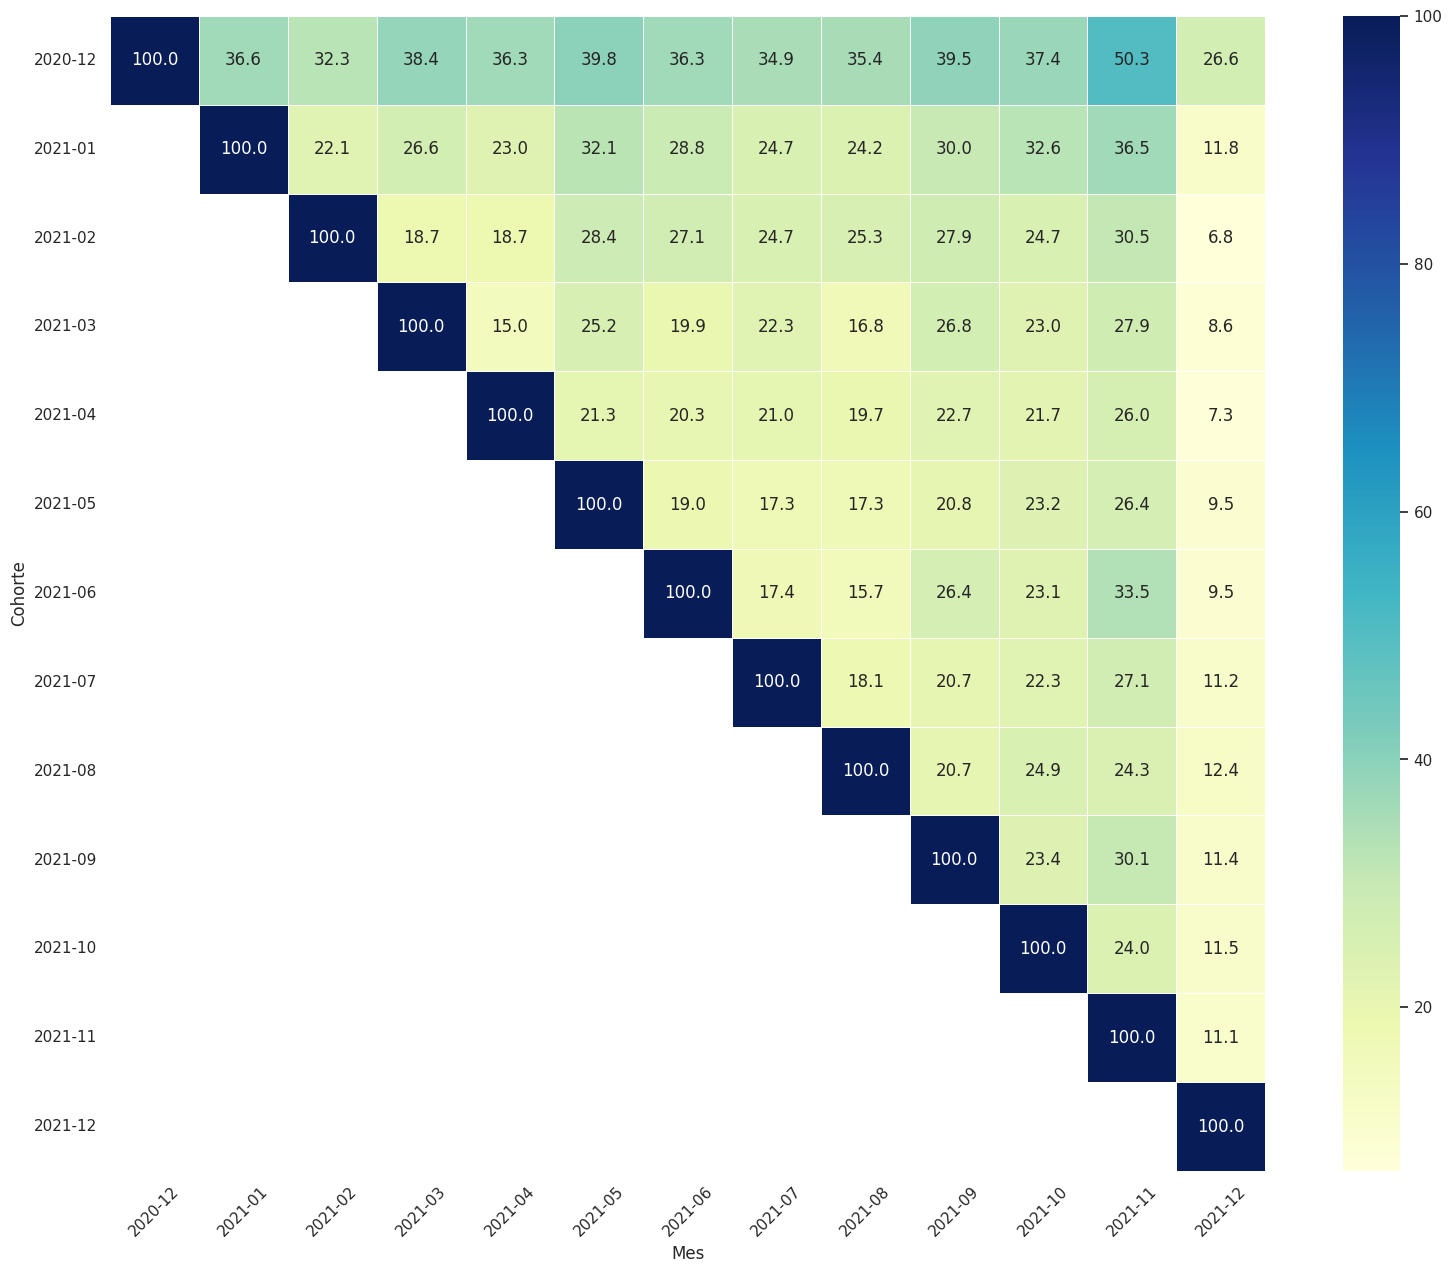

In [45]:
# Se crea una visualización heatmap de la matriz de retencion

plt.figure(figsize=(20, 15))
plt.rc('font', size=12)
sns.heatmap(matriz_retencion, annot=True, fmt=".1f", linewidths=.5, cmap='YlGnBu',square=True)
plt.ylabel('Cohorte')
plt.xlabel('Mes')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()


# SEGMENTACIÓN RFM

In [46]:
ventas.columns

Index(['N° de factura', 'Fecha de factura', 'ID Cliente', 'País', 'Cantidad',
       'Monto', 'Año_mes', 'UK'],
      dtype='object')

In [47]:
# Se crea un nuevo dataframe con las columnas de interes
df_clientes = ventas[['ID Cliente','N° de factura', 'Fecha de factura','Monto', 'UK']]

In [48]:
# Se filtra el dataframe por clientes pertenecientes a UK
df_clientes = df_clientes[df_clientes['UK']=='UK']

In [49]:
# Se analiza solo los Clientes que tienen un ID
df_clientes.dropna(subset=['ID Cliente'], inplace=True)

In [50]:
# Se filtra las facturas en las que el monto es 0
df_clientes= df_clientes[df_clientes['Monto']>0]

In [51]:
# Se calcula la ultima fecha del dataset como referencia y la última fecha de compra del cliente
ultima_fecha = df_clientes['Fecha de factura'].max().date()
df_clientes['Fecha de factura']= pd.DatetimeIndex(df_clientes['Fecha de factura']).date

In [52]:
# Se calcula los valors de recencia, frecuencia y valor monetario por cliente
rfm_df = df_clientes.groupby('ID Cliente').agg({'Fecha de factura': lambda fecha: (ultima_fecha-fecha.max()).days, 'N° de factura': lambda n: n.count(), 'Monto': lambda m: m.sum()})
rfm_df.columns= ['R', 'F', 'M']

In [53]:
# Se divide cada columna en 4 partes y se asignan las etiquetas de segmentacion RFM
r_etiquetas =[4,3,2,1]
fm_etiquetas =[1,2,3,4]

rfm_df['r_quartiles'] = pd.qcut(rfm_df['R'], q=4, labels=r_etiquetas, duplicates='drop')
rfm_df['f_quartiles'] = pd.qcut(rfm_df['F'], q=5, labels=fm_etiquetas, duplicates='drop')
rfm_df['m_quartiles'] = pd.qcut(rfm_df['M'], q=4, labels=fm_etiquetas, duplicates='drop')



In [54]:
# Se crea una nueva columna RFM
rfm_df['RFM'] = rfm_df['r_quartiles'].astype(str)+ rfm_df['f_quartiles'].astype(str) + rfm_df['m_quartiles'].astype(str)
rfm_df.head()

,R,F,M,r_quartiles,f_quartiles,m_quartiles,RFM
ID Cliente,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,11,4196.01,4,4,4,444
12748.0,0,209,33483.66,4,4,4,444
12749.0,3,5,4090.88,4,3,4,434
12820.0,3,4,942.34,4,3,3,433


**SEGMENTACIÓN DE CLIENTES**

1. **VIP:** los mejores clientes, han comprado recientemente, con mayor frecuencia y han generado la mayor cantidad de ingresos.

2. **Leales:** compran mas a menudo

3. **Mas ingresos:** clientes que han generado más ingresos.

4. **Prometedores:** clientes que suelen volver pero no gastan mucho.

5. **Novatos:** compradores de primera vez

6. **Durmientes:** grandes clientes en el pasado que no han comprado en un tiempo.

In [55]:
seg_map = {
    r'[3-4]4[3-4]': 'VIP',
    r'[1-4]4[1-3]': 'Leal',
    r'[1-4][1-3][3-4]': 'Mas ingresos',
    r'[1-4][1-4][1-2]': 'Prometedor',
    r'[3-4]1[1-4]': 'Novato',
    r'[1-2][3-4][1-4]': 'Durmiente',
}

In [56]:
rfm_df['Segmento'] = rfm_df['RFM'].replace(seg_map, regex=True)
rfm_df.head()

,R,F,M,r_quartiles,f_quartiles,m_quartiles,RFM,Segmento
ID Cliente,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,Mas ingresos
12747.0,2,11,4196.01,4,4,4,444,VIP
12748.0,0,209,33483.66,4,4,4,444,VIP
12749.0,3,5,4090.88,4,3,4,434,Mas ingresos
12820.0,3,4,942.34,4,3,3,433,Mas ingresos


In [57]:
segmento_df=rfm_df.groupby('Segmento').size().reset_index()
segmento_df.columns=['Segmento', 'Clientes']
segmento_df

,Segmento,Clientes
0,Durmiente,54
1,Leal,14
2,Mas ingresos,1328
3,Prometedor,1959
4,VIP,565
